<a href="https://colab.research.google.com/github/MrAsmodeo/Git/blob/master/Copia_de_Neuronal_K_NN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import pandas as pd
import io
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier
# Importar la clase KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Cargar la base de datos
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data'
col_names = ["Name","Left-Weight",'Left-Distance','Right-Weight','Right-Distance']
data =  pd.read_csv(csv_url, names = col_names)
data

,Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


In [ ]:
# Se imprimen detalles de la base de datos de Iris
print(data.dtypes)

Name              object
Left-Weight        int64
Left-Distance      int64
Right-Weight       int64
Right-Distance     int64
dtype: object


In [ ]:
#Datos de entrenamiento y prueba
training_set, validation_set = train_test_split(data, test_size = 0.3, random_state = 20)

#Dividir datos y etiquetas
X_train = training_set.iloc[:,1:5].values
Y_train = training_set.iloc[:,0].values
#Y_train = training_set['class'].values

X_val = validation_set.iloc[:,1:5].values
y_val = validation_set.iloc[:,0].values
#y_val = validation_set['class'].values

In [ ]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(10,10,5), max_iter=600,activation = 'relu',solver='sgd')

In [ ]:
print(X_train.shape)  # Debería imprimir algo como (500, num_features)
print(Y_train.shape)  # Debería imprimir algo como (500,)
## esto es para verificar los datos que llegan 

(437, 4)
(437,)


0.8776595744680851


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


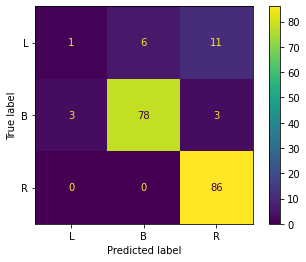

In [ ]:
classifier.fit(X_train, Y_train)
#Predicción sobre las instancias de prueba
y_pred = classifier.predict(X_val)
## See how the model performs on the test data.
print(classifier.score(X_val, y_val))

cm = confusion_matrix(y_val, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["L","B","R"])
disp.plot()

Precisión: 0.8563829787234043


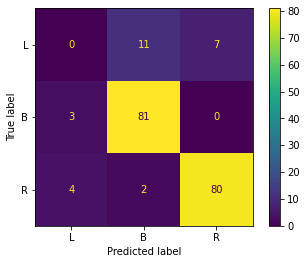

In [ ]:
# Crear una instancia de KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, Y_train)

# Predecir las etiquetas de las instancias de prueba
y_pred = knn.predict(X_val)

# Evaluar el rendimiento del modelo
cm = confusion_matrix(y_val, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["L","B","R"])
disp.plot()
print("Precisión:", knn.score(X_val, y_val))